In [1]:
import torch
from torchvision.models import vgg16
from datasets import PascalVOC2012, CamVid
from dummy_model import Dummy
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.autograd import Variable
from PIL import Image
import torchvision.transforms.functional as F

In [2]:
from fcn_model import FCNModel
import numpy as np
import matplotlib.pyplot as plt

# CAMVID

In [56]:
model0 = FCNModel(n_classes=11)

In [57]:
model0.from_file('/project/fcn_test-camvid.pt')
# model.eval()

In [85]:
dataset0 = CamVid('val')
len(dataset0)

101

In [92]:
data0 = dataset0[100]

127

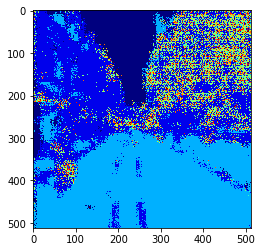

In [89]:
result = model0(data0['image'].unsqueeze(0))
out = result.detach().numpy()[0].argmax(axis=0)*(255/20)
out = out.astype('uint8')
plt.imshow(out, cmap='jet')
out.max()

(512, 512)


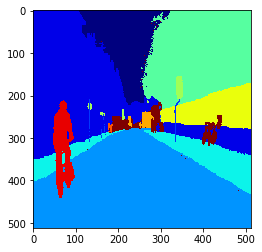

In [90]:
label = data0['label'].numpy()
plt.imshow(label, cmap='jet')
print(label.shape)

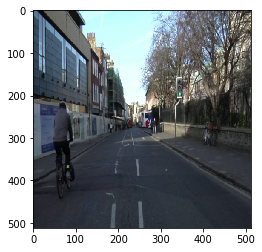

In [91]:
img = data0['image'].numpy()
img = np.transpose(img, (1, 2, 0))
img = (img - img.min())/(img.max()-img.min())
plt.imshow(img)

# PASCALVOC2012

In [51]:
model = FCNModel()

In [52]:
model.from_file('/project/fcn_test0.pt')
# model.eval()

In [5]:
dataset = PascalVOC2012('val')

In [46]:
data = dataset[9]

255

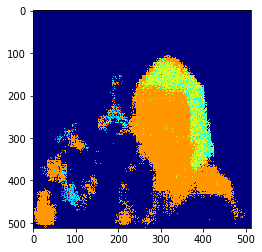

In [48]:
result = model(data['image'].unsqueeze(0))
out = result.detach().numpy()[0].argmax(axis=0)*(255/20)
out = out.astype('uint8')
plt.imshow(out, cmap='jet')
out.max()

(512, 512)


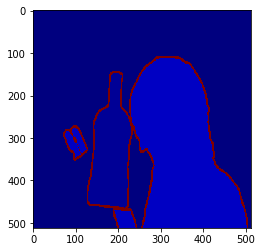

In [49]:
label = data['label'].numpy()
plt.imshow(label, cmap='jet')
print(label.shape)

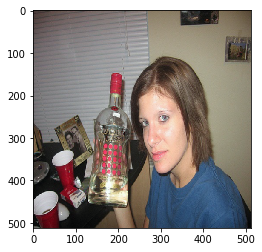

In [47]:
img = data['image'].numpy()
img = np.transpose(img, (1, 2, 0))
img = (img - img.min())/(img.max()-img.min())
plt.imshow(img)